In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
file_apriltag = 'ExcelFiles/data_apriltag.xlsx'
file_aruco = 'ExcelFiles/data_aruco.xlsx'

path_images = 'Plots/'

In [56]:
columns_general = ['time', 'frame index']
columns_orig = ['trans x original', 'trans y original', 'trans z original',
                'rot x deg original', 'rot y deg original', 'rot z deg original']

dict_legend = {'trans x' : 'along x',
               'trans y' : 'along y',
               'trans z' : 'along z',
               'rot x'   : 'about x',
               'rot y'   : 'about y',
               'rot z'   : 'about z'}

dict_motmog = {'columns_mot3z3' :
                   ['trans x mot3z3', 'trans y mot3z3', 'trans z mot3z3',
                    'rot x deg mot3z3', 'rot y deg mot3z3', 'rot z deg mot3z3'],
               'columns_mot3z2' : 
                   ['trans x mot3z2', 'trans y mot3z2', 'trans z mot3z2',
                    'rot x deg mot3z2', 'rot y deg mot3z2', 'rot z deg mot3z2'],
               'columns_mot3iqr' : 
                   ['trans x mot3iqr', 'trans y mot3iqr', 'trans z mot3iqr', 
                    'rot x deg mot3iqr', 'rot y deg mot3iqr', 'rot z deg mot3iqr'],
               'columns_mot5z3' :
                   ['trans x mot5z3', 'trans y mot5z3', 'trans z mot5z3',
                    'rot x deg mot5z3', 'rot y deg mot5z3', 'rot z deg mot5z3'],
               'columns_mot5z2' : 
                   ['trans x mot5z2', 'trans y mot5z2', 'trans z mot5z2',
                    'rot x deg mot5z2', 'rot y deg mot5z2', 'rot z deg mot5z2'],
               'columns_mot5iqr' :
                   ['trans x mot5iqr', 'trans y mot5iqr', 'trans z mot5iqr',
                    'rot x deg mot5iqr', 'rot y deg mot5iqr', 'rot z deg mot5iqr'],
               'columns_mot10z3' :
                   ['trans x mot10z3', 'trans y mot10z3', 'trans z mot10z3',
                    'rot x deg mot10z3', 'rot y deg mot10z3', 'rot z deg mot10z3'],
               'columns_mot10z2' :
                   ['trans x mot10z2', 'trans y mot10z2', 'trans z mot10z2',
                    'rot x deg mot10z2', 'rot y deg mot10z2', 'rot z deg mot10z2'],
               'columns_mot10iqr' : 
                   ['trans x mot10iqr', 'trans y mot10iqr', 'trans z mot10iqr', 
                    'rot x deg mot10iqr', 'rot y deg mot10iqr', 'rot z deg mot10iqr'],
               'columns_mog3z3' :
                   ['trans x mog3z3', 'trans y mog3z3', 'trans z mog3z3',
                    'rot x deg mog3z3', 'rot y deg mog3z3', 'rot z deg mog3z3'],
               'columns_mog3z2' : 
                   ['trans x mog3z2', 'trans y mog3z2', 'trans z mog3z2',
                    'rot x deg mog3z2', 'rot y deg mog3z2', 'rot z deg mog3z2'],
               'columns_mog3iqr' : 
                   ['trans x mog3iqr', 'trans y mog3iqr', 'trans z mog3iqr', 
                    'rot x deg mog3iqr', 'rot y deg mog3iqr', 'rot z deg mog3iqr'],
               'columns_mog5z3' :
                   ['trans x mog5z3', 'trans y mog5z3', 'trans z mog5z3',
                    'rot x deg mog5z3', 'rot y deg mog5z3', 'rot z deg mog5z3'],
               'columns_mog5z2' : 
                   ['trans x mog5z2', 'trans y mog5z2', 'trans z mog5z2',
                    'rot x deg mog5z2', 'rot y deg mog5z2', 'rot z deg mog5z2'],
               'columns_mog5iqr' :
                   ['trans x mog5iqr', 'trans y mog5iqr', 'trans z mog5iqr',
                    'rot x deg mog5iqr', 'rot y deg mog5iqr', 'rot z deg mog5iqr'],
               'columns_mog9z3' :
                   ['trans x mog9z3', 'trans y mog9z3', 'trans z mog9z3',
                    'rot x deg mog9z3', 'rot y deg mog9z3', 'rot z deg mog9z3'],
               'columns_mog9z2' :
                   ['trans x mog9z2', 'trans y mog9z2', 'trans z mog9z2',
                    'rot x deg mog9z2', 'rot y deg mog9z2', 'rot z deg mog9z2'],
               'columns_mog9iqr' : 
                   ['trans x mog9iqr', 'trans y mog9iqr', 'trans z mog9iqr', 
                    'rot x deg mog9iqr', 'rot y deg mog9iqr', 'rot z deg mog9iqr']}

<AxesSubplot:xlabel='a'>

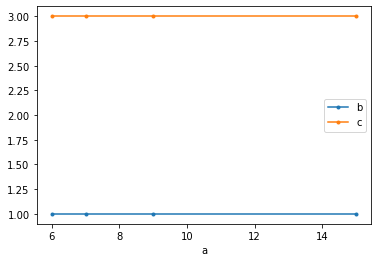

In [66]:
df_test = pd.DataFrame({"a":[6, 7, 9, 15], "b":[1, 1, 1, 1], "c":[3,3,3,3]})
df_test.plot(x="a", y=["b", "c"], marker=".")

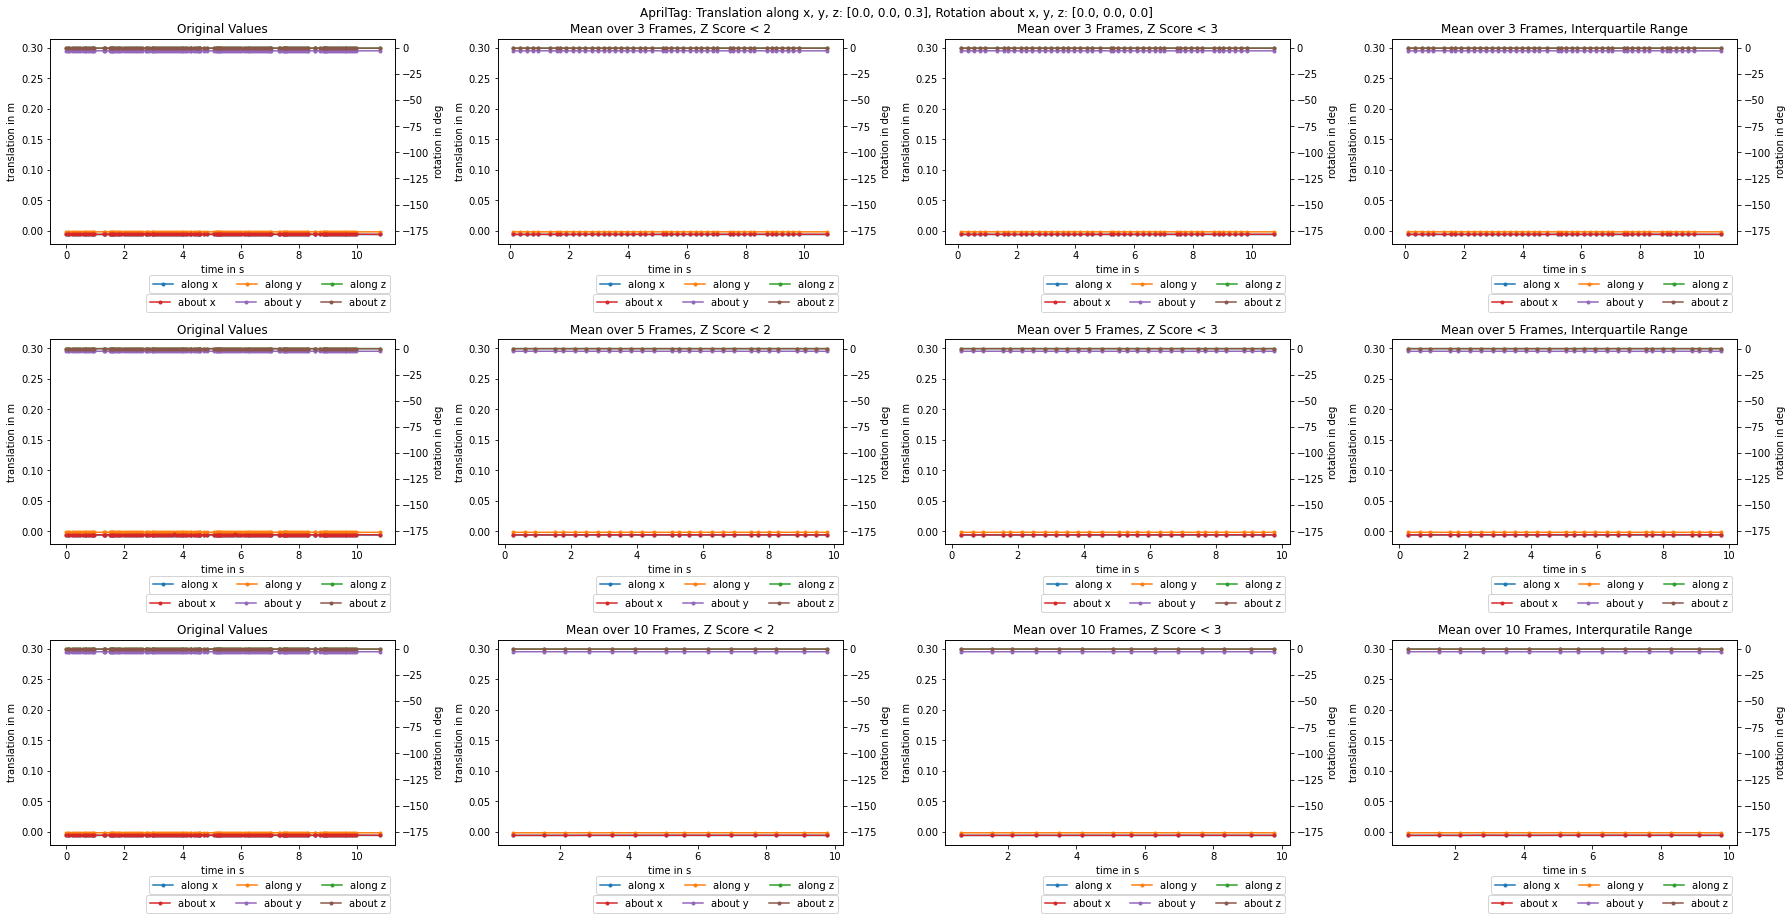

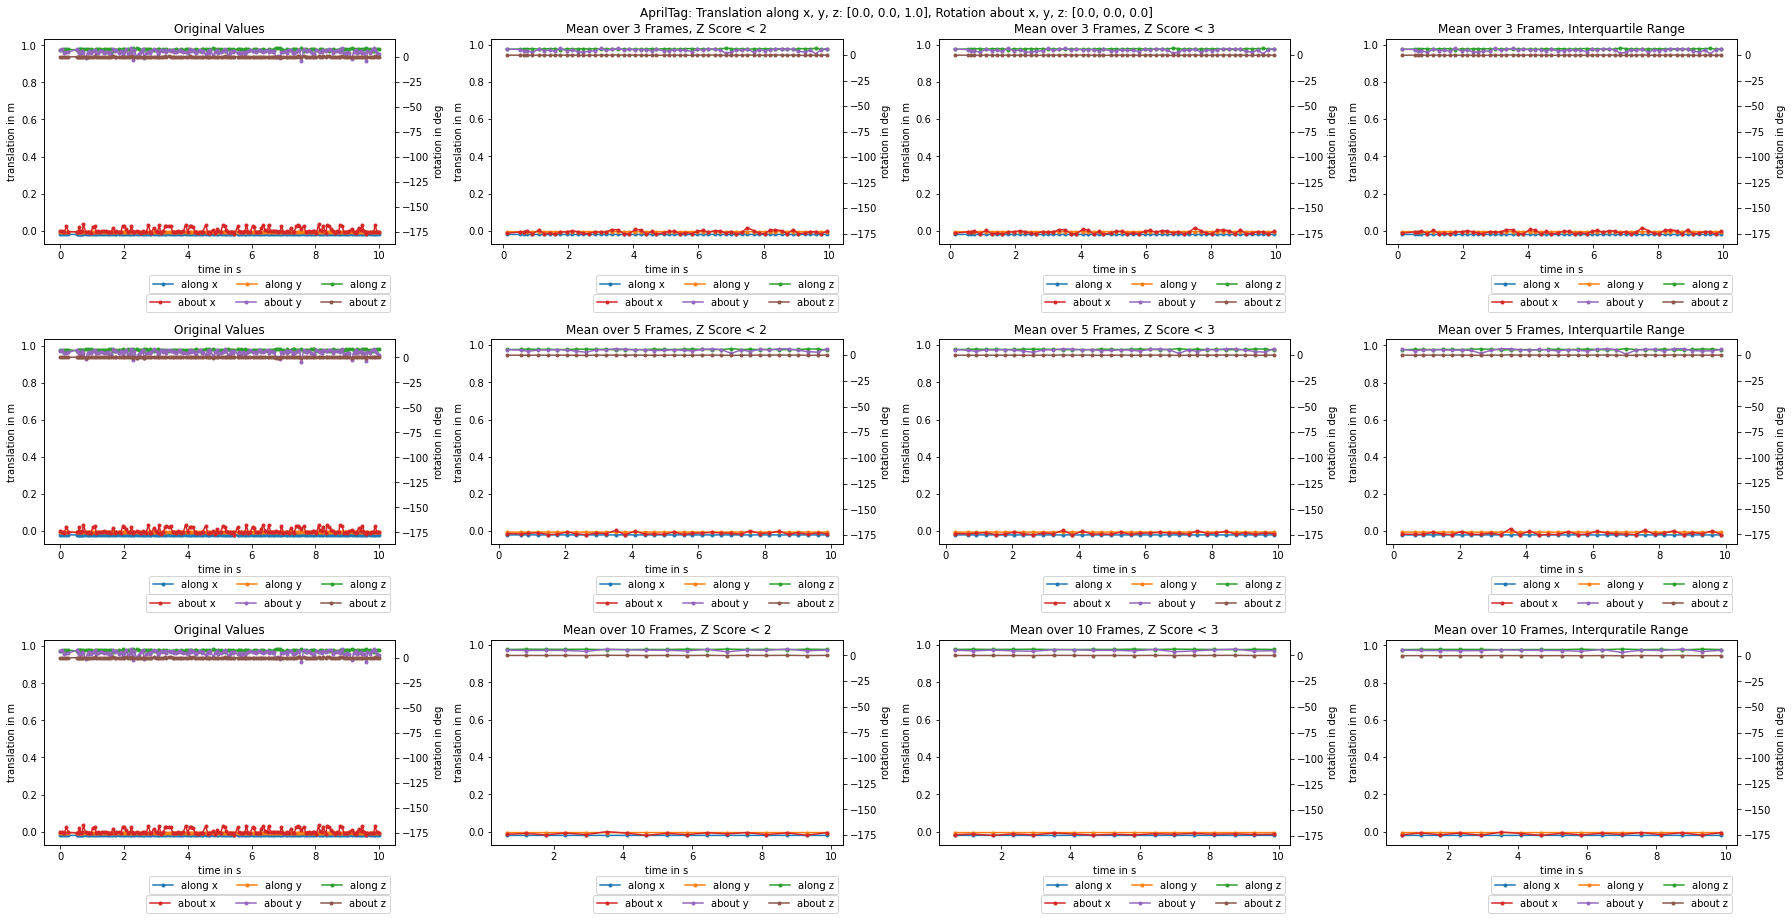

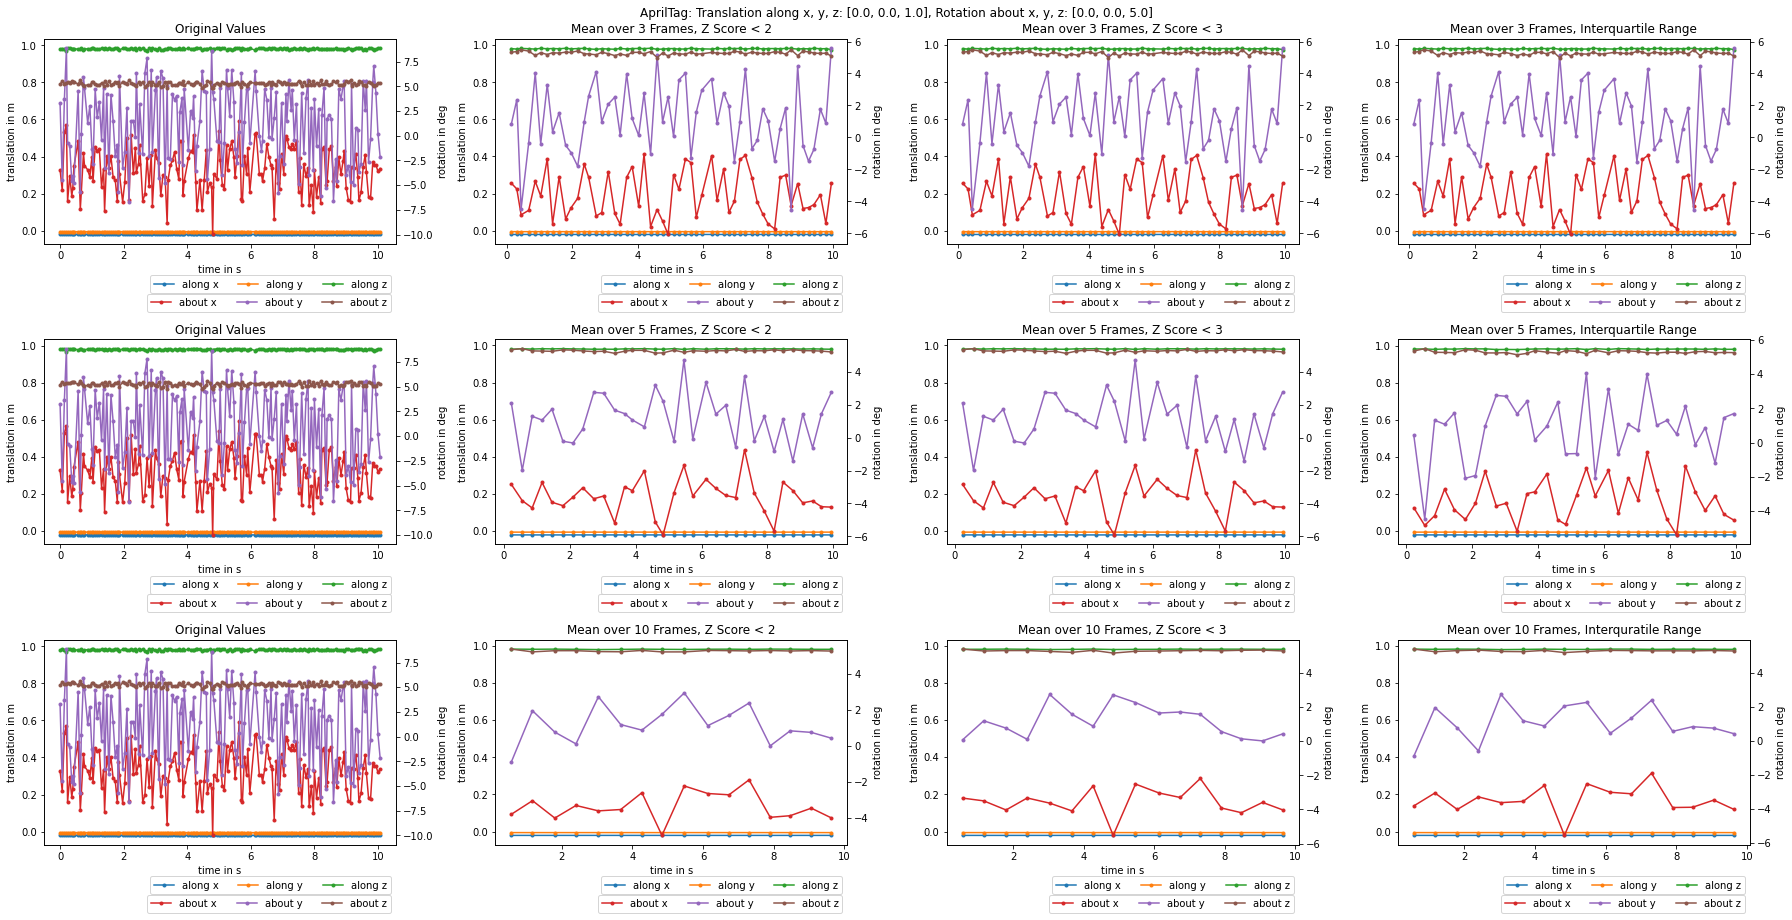

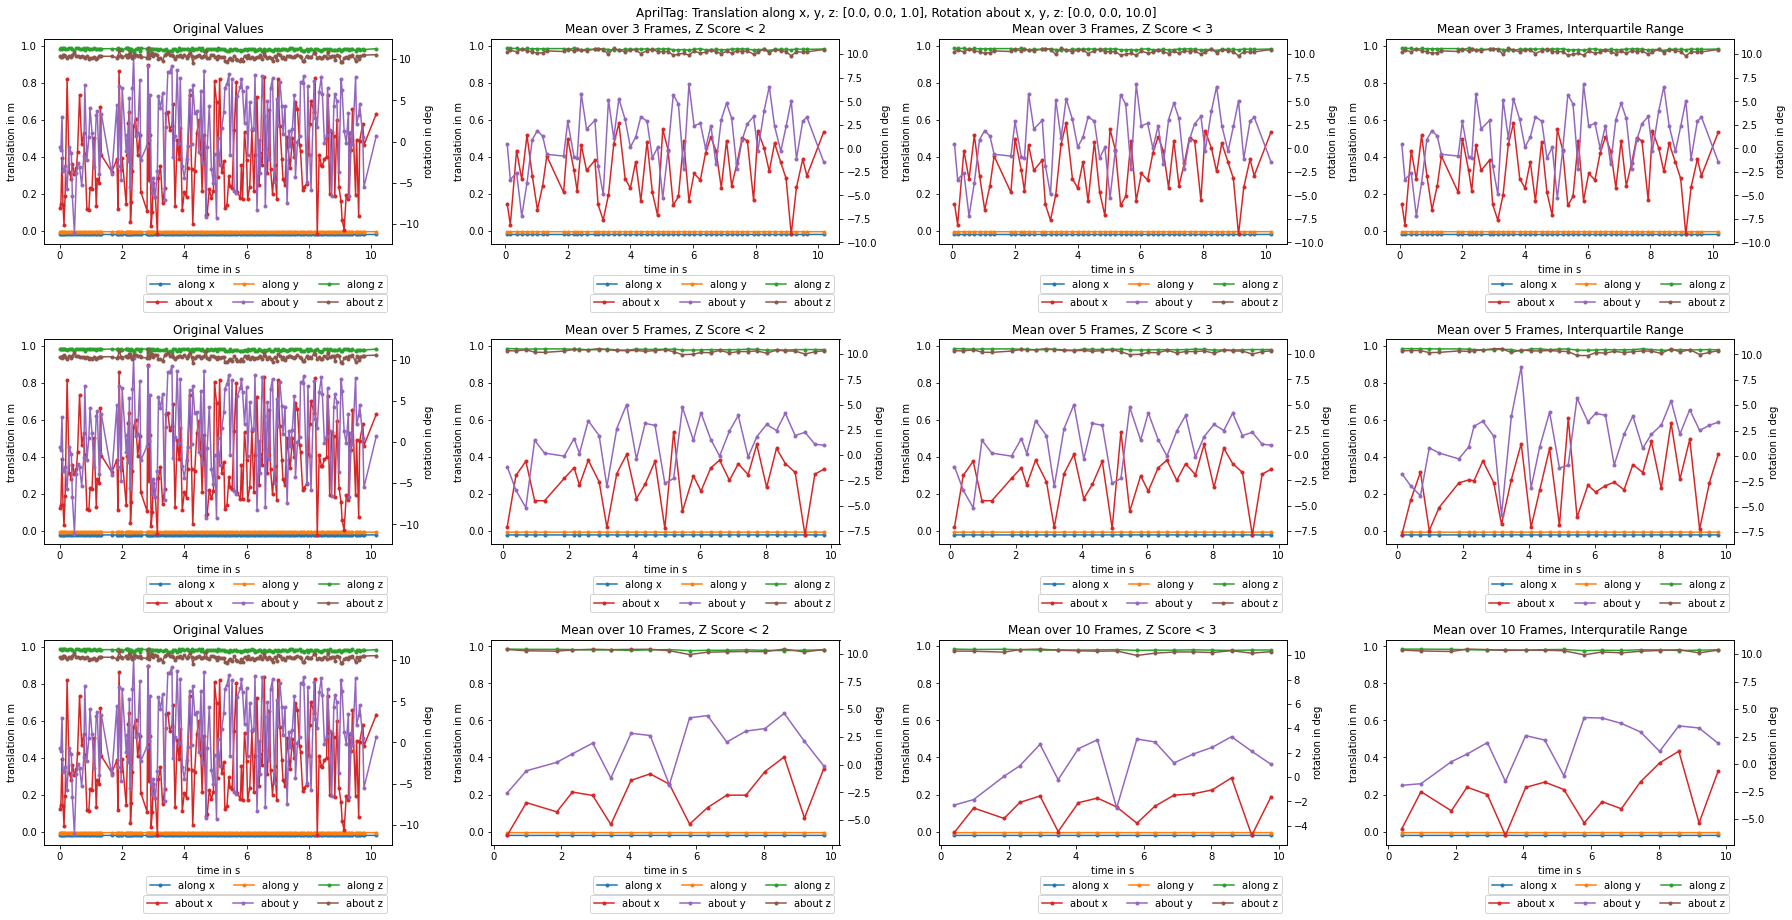

In [123]:
df_apriltag = pd.read_excel(file_apriltag)
df_aruco = pd.read_excel(file_aruco)
# print(np.array(df_apriltag['frame index'])<0)
# print(np.any(np.array(df_apriltag['frame index'])<0))
idx_gt_apriltag = np.where(np.array(df_apriltag['frame index'])<0)#np.any(np.array(df_apriltag['frame index'])<0))
idx_gt_aruco = np.where(np.array(df_aruco['frame index'])<0)#np.any(np.array(df_apriltag['frame index'])<0))
dfs_apriltag = list()
for i, val_idx in enumerate(idx_gt_apriltag[0][:-1]):
    df = df_apriltag.loc[val_idx+1:idx_gt_apriltag[0][i+1]-1]
    gt_vals = df_apriltag.loc[val_idx]
    dfs_apriltag.append([df, gt_vals[columns_orig[:3]].tolist(), gt_vals[columns_orig[-3:]].tolist()])
    #dfs_apriltag.append(df)
dfs_apriltag.append([df_apriltag.loc[idx_gt_apriltag[0][-1]+1:], 
                     df_apriltag.loc[idx_gt_apriltag[0][-1]][columns_orig[:3]].tolist(),
                     df_apriltag.loc[idx_gt_apriltag[0][-1]][columns_orig[-3:]].tolist()])
dfs_aruco = list()
for i, val_idx in enumerate(idx_gt_aruco[0][:-1]):
    df = df_aruco.loc[val_idx+1:idx_gt_aruco[0][i+1]-1]
    gt_vals = df_aruco.loc[val_idx]
    dfs_aruco.append([df, gt_vals[columns_orig[:3]].tolist(), gt_vals[columns_orig[-3:]].tolist()])
    #print(df_aruco.loc[val_idx][columns_orig[:3]].tolist() + df_aruco.loc[val_idx][columns_orig[-3:]].tolist())
dfs_aruco.append([df_aruco.loc[idx_gt_aruco[0][-1]+1:], 
                  df_aruco.loc[idx_gt_aruco[0][-1]][columns_orig[:3]].tolist(),
                  df_aruco.loc[idx_gt_aruco[0][-1]][columns_orig[-3:]].tolist()])
# dfs_aruco_mog = list()
# for i, val_idx in enumerate(idx_gt_aruco_mog[0][:-1]):
#     df = df_aruco_mog.loc[val_idx+1:idx_gt_aruco_mog[0][i+1]-1]
#     dfs_aruco_mog.append(df)
# dfs_aruco_mog.append(df_aruco_mog.loc[idx_gt_aruco_mog[0][-1]+1:])
# dfs_apriltag_mog = list()
# for i, val_idx in enumerate(idx_gt_apriltag_mog[0][:-1]):
#     df = df_apriltag_mog.loc[val_idx+1:idx_gt_apriltag_mog[0][i+1]-1]
#     dfs_apriltag_mog.append(df)
# dfs_apriltag_mog.append(df_apriltag.loc[idx_gt_apriltag_mog[0][-1]+1:])
  
# dfs_original = list()
# dfs_mot3 = list()
# dfs_mot5 = list()
# dfs_mot10 = list()
# col.rsplit(' ', 1)[0]
legend_trans = [dict_legend[key] for key in [' '.join(col.split()[:2]) for col in columns_orig[:3]]]
legend_rot = [dict_legend[key] for key in [' '.join(col.split()[:2]) for col in columns_orig[3:]]]

for i, df in enumerate(dfs_apriltag):
    
    fig, axes = plt.subplots(3, 4, figsize=(25,13))
    
    fig.suptitle(f'AprilTag: Translation along x, y, z: {df[1]}, Rotation about x, y, z: {df[2]}')
    #df_orig = df[columns_orig[:3]]
    df[0].plot(ax=axes[0,0], x="time", y=columns_orig[:3], marker='.')#, xticks=df['time'].tolist())
    df[0].plot(ax=axes[0,0], x="time", y=columns_orig[-3:], marker='.', secondary_y=True)
    axes[0,0].set_xlabel("time in s")
    axes[0,0].set_ylabel("translation in m")
    axes[0,0].right_ax.set_ylabel("rotation in deg")
    axes[0,0].title.set_text("Original Values")
    axes[0,0].legend(legend_trans, ncol=3, bbox_to_anchor=(1,-0.13))
    axes[0,0].right_ax.legend(legend_rot, ncol=3,  bbox_to_anchor=(1, -0.22))
    #axes[0,0].right_ax.legend(legend_rot, bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=3)
    
    #print(dict_motmog['columns_mot3z3'][:3])
    #print(df[dict_motmog['columns_mot3z3'][:3]].head(3))
    mot3 = ['time'] + dict_motmog['columns_mot3z2'] + dict_motmog['columns_mot3z3'] + dict_motmog['columns_mot3iqr']
    df3 = df[0][mot3].dropna()
    df3.plot(ax=axes[0,1], x="time", y=dict_motmog['columns_mot3z2'][:3],  marker='.')#columns_orig[:3])#, xticks=df['time'].tolist())
    df3.plot(ax=axes[0,1], x="time", y=dict_motmog['columns_mot3z2'][-3:],  marker='.', secondary_y=True)
    axes[0,1].set_xlabel("time in s")
    axes[0,1].set_ylabel("translation in m")
    axes[0,1].right_ax.set_ylabel("rotation in deg")
    axes[0,1].title.set_text("Mean over 3 Frames, Z Score < 2")
    axes[0,1].legend(legend_trans, ncol=3, bbox_to_anchor=(1, -0.13))
    axes[0,1].right_ax.legend(legend_rot, ncol=3,  bbox_to_anchor=(1, -0.22))
    
    df3.plot(ax=axes[0,2], x="time", y=dict_motmog['columns_mot3z3'][:3],  marker='.')#columns_orig[:3])#, xticks=df['time'].tolist())
    df3.plot(ax=axes[0,2], x="time", y=dict_motmog['columns_mot3z3'][-3:],  marker='.', secondary_y=True)
    axes[0,2].set_xlabel("time in s")
    axes[0,2].set_ylabel("translation in m")
    axes[0,2].right_ax.set_ylabel("rotation in deg")
    axes[0,2].title.set_text("Mean over 3 Frames, Z Score < 3")
    axes[0,2].legend(legend_trans, ncol=3, bbox_to_anchor=(1, -0.13))
    axes[0,2].right_ax.legend(legend_rot, ncol=3,  bbox_to_anchor=(1, -0.22))
    
    df3.plot(ax=axes[0,3], x="time", y=dict_motmog['columns_mot3iqr'][:3],  marker='.')
    df3.plot(ax=axes[0,3], x="time", y=dict_motmog['columns_mot3iqr'][-3:],  marker='.', secondary_y=True)
    axes[0,3].set_xlabel("time in s")
    axes[0,3].set_ylabel("translation in m")
    axes[0,3].right_ax.set_ylabel("rotation in deg")
    axes[0,3].title.set_text("Mean over 3 Frames, Interquartile Range")
    axes[0,3].legend(legend_trans, ncol=3, bbox_to_anchor=(1,-0.13))
    axes[0,3].right_ax.legend(legend_rot, ncol=3,  bbox_to_anchor=(1, -0.22))
    
    
    
    df[0].plot(ax=axes[1,0], x="time", y=columns_orig[:3], marker='.')
    df[0].plot(ax=axes[1,0], x="time", y=columns_orig[-3:], marker='.', secondary_y=True)
    axes[1,0].set_xlabel("time in s")
    axes[1,0].set_ylabel("translation in m")
    axes[1,0].right_ax.set_ylabel("rotation in deg")
    axes[1,0].title.set_text("Original Values")
    axes[1,0].legend(legend_trans, ncol=3, bbox_to_anchor=(1,-0.13))
    axes[1,0].right_ax.legend(legend_rot, ncol=3,  bbox_to_anchor=(1, -0.22))
    
    mot5 = ['time'] + dict_motmog['columns_mot5z2'] + dict_motmog['columns_mot5z3'] + dict_motmog['columns_mot5iqr']
    df5 = df[0][mot5].dropna()
    df5.plot(ax=axes[1,1], x="time", y=dict_motmog['columns_mot5z2'][:3],  marker='.')
    df5.plot(ax=axes[1,1], x="time", y=dict_motmog['columns_mot5z2'][-3:],  marker='.', secondary_y=True)
    axes[1,1].set_xlabel("time in s")
    axes[1,1].set_ylabel("translation in m")
    axes[1,1].right_ax.set_ylabel("rotation in deg")
    axes[1,1].title.set_text("Mean over 5 Frames, Z Score < 2")
    axes[1,1].legend(legend_trans, ncol=3, bbox_to_anchor=(1, -0.13))
    axes[1,1].right_ax.legend(legend_rot, ncol=3,  bbox_to_anchor=(1, -0.22))
    
    df5.plot(ax=axes[1,2], x="time", y=dict_motmog['columns_mot5z3'][:3],  marker='.')
    df5.plot(ax=axes[1,2], x="time", y=dict_motmog['columns_mot5z3'][-3:],  marker='.', secondary_y=True)
    axes[1,2].set_xlabel("time in s")
    axes[1,2].set_ylabel("translation in m")
    axes[1,2].right_ax.set_ylabel("rotation in deg")
    axes[1,2].title.set_text("Mean over 5 Frames, Z Score < 3")
    axes[1,2].legend(legend_trans, ncol=3, bbox_to_anchor=(1, -0.13))
    axes[1,2].right_ax.legend(legend_rot, ncol=3,  bbox_to_anchor=(1, -0.22))
    
    df5.plot(ax=axes[1,3], x="time", y=dict_motmog['columns_mot5iqr'][:3],  marker='.')
    df5.plot(ax=axes[1,3], x="time", y=dict_motmog['columns_mot5iqr'][-3:],  marker='.', secondary_y=True)
    axes[1,3].set_xlabel("time in s")
    axes[1,3].set_ylabel("translation in m")
    axes[1,3].right_ax.set_ylabel("rotation in deg")
    axes[1,3].title.set_text("Mean over 5 Frames, Interquartile Range")
    axes[1,3].legend(legend_trans, ncol=3, bbox_to_anchor=(1, -0.13))
    axes[1,3].right_ax.legend(legend_rot, ncol=3,  bbox_to_anchor=(1, -0.22))
    
    
    
    df[0].plot(ax=axes[2,0], x="time", y=columns_orig[:3], marker='.')
    df[0].plot(ax=axes[2,0], x="time", y=columns_orig[-3:], marker='.', secondary_y=True)
    axes[2,0].set_xlabel("time in s")
    axes[2,0].set_ylabel("translation in m")
    axes[2,0].right_ax.set_ylabel("rotation in deg")
    axes[2,0].title.set_text("Original Values")
    axes[2,0].legend(legend_trans, ncol=3, bbox_to_anchor=(1, -0.13))
    axes[2,0].right_ax.legend(legend_rot, ncol=3,  bbox_to_anchor=(1,-0.22))
    
    mot10 = ['time'] + dict_motmog['columns_mot10z2'] + dict_motmog['columns_mot10z3'] + dict_motmog['columns_mot10iqr']
    df10 = df[0][mot10].dropna()
    df10.plot(ax=axes[2,1], x="time", y=dict_motmog['columns_mot10z2'][:3],  marker='.')
    df10.plot(ax=axes[2,1], x="time", y=dict_motmog['columns_mot10z2'][-3:],  marker='.', secondary_y=True)
    axes[2,1].set_xlabel("time in s")
    axes[2,1].set_ylabel("translation in m")
    axes[2,1].right_ax.set_ylabel("rotation in deg")
    axes[2,1].title.set_text("Mean over 10 Frames, Z Score < 2")
    axes[2,1].legend(legend_trans, ncol=3, bbox_to_anchor=(1, -0.13))
    axes[2,1].right_ax.legend(legend_rot, ncol=3,  bbox_to_anchor=(1, -0.22))
    
    df10.plot(ax=axes[2,2], x="time", y=dict_motmog['columns_mot10z3'][:3],  marker='.')
    df10.plot(ax=axes[2,2], x="time", y=dict_motmog['columns_mot10z3'][-3:],  marker='.', secondary_y=True)
    axes[2,2].set_xlabel("time in s")
    axes[2,2].set_ylabel("translation in m")
    axes[2,2].right_ax.set_ylabel("rotation in deg")
    axes[2,2].title.set_text("Mean over 10 Frames, Z Score < 3")
    axes[2,2].legend(legend_trans, ncol=3, bbox_to_anchor=(1, -0.13))
    axes[2,2].right_ax.legend(legend_rot, ncol=3,  bbox_to_anchor=(1, -0.22))
    
    df10.plot(ax=axes[2,3], x="time", y=dict_motmog['columns_mot10iqr'][:3],  marker='.')
    df10.plot(ax=axes[2,3], x="time", y=dict_motmog['columns_mot10iqr'][-3:],  marker='.', secondary_y=True)
    axes[2,3].set_xlabel("time in s")
    axes[2,3].set_ylabel("translation in m")
    axes[2,3].right_ax.set_ylabel("rotation in deg")
    axes[2,3].title.set_text("Mean over 10 Frames, Interquratile Range")
    axes[2,3].legend(legend_trans, ncol=3, bbox_to_anchor=(1, -0.13))
    axes[2,3].right_ax.legend(legend_rot, ncol=3,  bbox_to_anchor=(1, -0.22))
    
    fig.tight_layout()
    
    plt.savefig(path_images + f'apriltag_{int(df[1][0]*100)}_{int(df[1][1]*100)}_{int(df[1][2]*100)}_{int(df[2][0])}_{int(df[2][1])}_{int(df[2][2])}.pdf', bbox_inches='tight')
    
    # print(len(df['time'].tolist()))
    # print(len(df[columns_orig[0]]))

In [ ]:
"""
    df_mot3z3 = df[dict_motmog['columns_mot3z3'][:3]].dropna()
    df_mot3z3.plot(ax=axes[0,1])
    df_mot3z2 = df[dict_motmog['columns_mot3z2'][:3]].dropna() 
    df_mot3z2.plot(ax=axes[0,2])
    df_mot3iqr = df[dict_motmog['columns_mot3iqr'][:3]].dropna() 
    df_mot3iqr.plot(ax=axes[0,3])
    
    df_orig.plot(ax=axes[1,0])
    df_mot5z3 = df[dict_motmog['columns_mot5z3'][:3]].dropna()
    df_mot5z3.plot(ax=axes[1,1])
    df_mot5z2 = df[dict_motmog['columns_mot5z2'][:3]].dropna() 
    df_mot5z2.plot(ax=axes[1,2])
    df_mot5iqr = df[dict_motmog['columns_mot5iqr'][:3]].dropna() 
    df_mot5iqr.plot(ax=axes[1,3])
    
    df_orig.plot(ax=axes[2,0])
    df_mot10z3 = df[dict_motmog['columns_mot10z3'][:3]].dropna()
    df_mot10z3.plot(ax=axes[2,1])
    df_mot10z2 = df[dict_motmog['columns_mot10z2'][:3]].dropna() 
    df_mot10z2.plot(ax=axes[2,2])
    df_mot10iqr = df[dict_motmog['columns_mot10iqr'][:3]].dropna() 
    df_mot10iqr.plot(ax=axes[2,3])
    
    plt.savefig(path_images + f'translation_{i}.pdf', bbox_inches='tight')
    
    fig, axes = plt.subplots(3, 4, figsize=(25,10))
    
    fig.suptitle(f'Rotation {i}')
    df_orig = df[columns_orig[-3:]]
    df_orig.plot(ax=axes[0,0])
    
    df_mot3z3 = df[dict_motmog['columns_mot3z3'][-3:]].dropna()
    df_mot3z3.plot(ax=axes[0,1])
    df_mot3z2 = df[dict_motmog['columns_mot3z2'][-3:]].dropna() 
    df_mot3z2.plot(ax=axes[0,2])
    df_mot3iqr = df[dict_motmog['columns_mot3iqr'][-3:]].dropna() 
    df_mot3iqr.plot(ax=axes[0,3])
    
    df_orig.plot(ax=axes[1,0])
    df_mot5z3 = df[dict_motmog['columns_mot5z3'][-3:]].dropna()
    df_mot5z3.plot(ax=axes[1,1])
    df_mot5z2 = df[dict_motmog['columns_mot5z2'][-3:]].dropna() 
    df_mot5z2.plot(ax=axes[1,2])
    df_mot5iqr = df[dict_motmog['columns_mot5iqr'][-3:]].dropna() 
    df_mot5iqr.plot(ax=axes[1,3])
    
    df_orig.plot(ax=axes[2,0])
    df_mot10z3 = df[dict_motmog['columns_mot10z3'][-3:]].dropna()
    df_mot10z3.plot(ax=axes[2,1])
    df_mot10z2 = df[dict_motmog['columns_mot10z2'][-3:]].dropna() 
    df_mot10z2.plot(ax=axes[2,2])
    df_mot10iqr = df[dict_motmog['columns_mot10iqr'][-3:]].dropna() 
    df_mot10iqr.plot(ax=axes[2,3])
    
    plt.savefig(path_images + f'rotation_{i}.pdf', bbox_inches='tight')
    
    
# dfs_original = list()
# dfs_mot3 = list()
# dfs_mot5 = list()
# dfs_mot10 = list()
for i, df in enumerate(dfs_aruco):
    fig, axes = plt.subplots(3, 4, figsize=(25,10))
    
    fig.suptitle(f'Translation {i}')
    df_orig = df[columns_orig[:3]]
    df_orig.plot(ax=axes[0,0])
    
    df_mot3z3 = df[dict_motmog['columns_mot3z3'][:3]].dropna()
    df_mot3z3.plot(ax=axes[0,1])
    df_mot3z2 = df[dict_motmog['columns_mot3z2'][:3]].dropna() 
    df_mot3z2.plot(ax=axes[0,2])
    df_mot3iqr = df[dict_motmog['columns_mot3iqr'][:3]].dropna() 
    df_mot3iqr.plot(ax=axes[0,3])
    
    df_orig.plot(ax=axes[1,0])
    df_mot5z3 = df[dict_motmog['columns_mot5z3'][:3]].dropna()
    df_mot5z3.plot(ax=axes[1,1])
    df_mot5z2 = df[dict_motmog['columns_mot5z2'][:3]].dropna() 
    df_mot5z2.plot(ax=axes[1,2])
    df_mot5iqr = df[dict_motmog['columns_mot5iqr'][:3]].dropna() 
    df_mot5iqr.plot(ax=axes[1,3])
    
    df_orig.plot(ax=axes[2,0])
    df_mot10z3 = df[dict_motmog['columns_mot10z3'][:3]].dropna()
    df_mot10z3.plot(ax=axes[2,1])
    df_mot10z2 = df[dict_motmog['columns_mot10z2'][:3]].dropna() 
    df_mot10z2.plot(ax=axes[2,2])
    df_mot10iqr = df[dict_motmog['columns_mot10iqr'][:3]].dropna() 
    df_mot10iqr.plot(ax=axes[2,3])
    
    plt.savefig(path_images + f'aruco_translation_{i}.pdf', bbox_inches='tight')
    
    fig, axes = plt.subplots(3, 4, figsize=(25,10))
    
    fig.suptitle(f'Rotation {i}')
    df_orig = df[columns_orig[-3:]]
    df_orig.plot(ax=axes[0,0])
    
    df_mot3z3 = df[dict_motmog['columns_mot3z3'][-3:]].dropna()
    df_mot3z3.plot(ax=axes[0,1])
    df_mot3z2 = df[dict_motmog['columns_mot3z2'][-3:]].dropna() 
    df_mot3z2.plot(ax=axes[0,2])
    df_mot3iqr = df[dict_motmog['columns_mot3iqr'][-3:]].dropna() 
    df_mot3iqr.plot(ax=axes[0,3])
    
    df_orig.plot(ax=axes[1,0])
    df_mot5z3 = df[dict_motmog['columns_mot5z3'][-3:]].dropna()
    df_mot5z3.plot(ax=axes[1,1])
    df_mot5z2 = df[dict_motmog['columns_mot5z2'][-3:]].dropna() 
    df_mot5z2.plot(ax=axes[1,2])
    df_mot5iqr = df[dict_motmog['columns_mot5iqr'][-3:]].dropna() 
    df_mot5iqr.plot(ax=axes[1,3])
    
    df_orig.plot(ax=axes[2,0])
    df_mot10z3 = df[dict_motmog['columns_mot10z3'][-3:]].dropna()
    df_mot10z3.plot(ax=axes[2,1])
    df_mot10z2 = df[dict_motmog['columns_mot10z2'][-3:]].dropna() 
    df_mot10z2.plot(ax=axes[2,2])
    df_mot10iqr = df[dict_motmog['columns_mot10iqr'][-3:]].dropna() 
    df_mot10iqr.plot(ax=axes[2,3])
    
    plt.savefig(path_images + f'aruco_rotation_{i}.pdf', bbox_inches='tight')
"""

In [ ]:
df_apriltag_1 = pd.read_excel(file_apriltag.replace('.xlsx', '_mog3.xlsx'))
idx_gt_apriltag_1 = np.where(np.array(df_apriltag_1['frame index'])<0)#np.any(np.array(df_apriltag_1['frame index'])<0))

dfs_apriltag_1 = list()
for j, val_idx in enumerate(idx_gt_apriltag_1[0][:-1]):
    df = df_apriltag_1.loc[val_idx+1:idx_gt_apriltag_1[0][j+1]-1]
    dfs_apriltag_1.append(df)
dfs_apriltag_1.append(df_apriltag_1.loc[idx_gt_apriltag_1[0][-1]+1:])

df_apriltag_2 = pd.read_excel(file_apriltag.replace('.xlsx', '_mog5.xlsx'))
idx_gt_apriltag_2 = np.where(np.array(df_apriltag_2['frame index'])<0)#np.any(np.array(df_apriltag_2['frame index'])<0))

dfs_apriltag_2 = list()
for j, val_idx in enumerate(idx_gt_apriltag_2[0][:-1]):
    df = df_apriltag_2.loc[val_idx+1:idx_gt_apriltag_2[0][j+1]-1]
    dfs_apriltag_2.append(df)
dfs_apriltag_2.append(df_apriltag_2.loc[idx_gt_apriltag_2[0][-1]+1:])

for k, df in enumerate(dfs_apriltag_1):    
    dfs_mog3_trans = list()
    dfs_mog5_trans = list()
    dfs_mog3_rot = list()
    dfs_mog5_rot = list()
  
    for l in ['z2', 'z3', 'iqr']:
        df3 = df[dict_motmog[f'columns_mog3{l}'][:3]]
        dfs_mog3_trans.append(df3)
        df3 = df[dict_motmog[f'columns_mog3{l}'][-3:]]
        dfs_mog3_rot.append(df3)
        df5 = dfs_apriltag_2[k][dict_motmog[f'columns_mog5{l}'][:3]]
        dfs_mog5_trans.append(df5)
        df5 = dfs_apriltag_2[k][dict_motmog[f'columns_mog5{l}'][-3:]]
        dfs_mog5_rot.append(df5)
  
      
    fig, axes = plt.subplots(2, 3, figsize=(25,10))
    fig.suptitle(f'Translation Mean Over Grid 3/5 {k}')
  
    for col, df in enumerate(dfs_mog3_trans):
        df.plot(ax=axes[0, col])
        dfs_mog5_trans[col].plot(ax=axes[1, col])
      
    plt.savefig(path_images + f'apriltag_translation_mog35_{k}.pdf', bbox_inches='tight')
      
    fig, axes = plt.subplots(2, 3, figsize=(25,10))
    fig.suptitle(f'Rotation Mean Over Grid 3/5 {k}')
  
    for col, df in enumerate(dfs_mog3_rot):
        df.plot(ax=axes[0, col])
        dfs_mog5_rot[col].plot(ax=axes[1, col])
          
    plt.savefig(path_images + f'apriltag_rotation_mog35_{k}.pdf', bbox_inches='tight')




df_aruco_1 = pd.read_excel(file_aruco.replace('.xlsx', '_mog3.xlsx'))
idx_gt_aruco_1 = np.where(np.array(df_aruco_1['frame index'])<0)#np.any(np.array(df_aruco_1['frame index'])<0))

dfs_aruco_1 = list()
for j, val_idx in enumerate(idx_gt_aruco_1[0][:-1]):
    df = df_aruco_1.loc[val_idx+1:idx_gt_aruco_1[0][j+1]-1]
    dfs_aruco_1.append(df)
dfs_aruco_1.append(df_aruco_1.loc[idx_gt_aruco_1[0][-1]+1:])

df_aruco_2 = pd.read_excel(file_aruco.replace('.xlsx', '_mog5.xlsx'))
idx_gt_aruco_2 = np.where(np.array(df_aruco_2['frame index'])<0)#np.any(np.array(df_aruco_2['frame index'])<0))

dfs_aruco_2 = list()
for j, val_idx in enumerate(idx_gt_aruco_2[0][:-1]):
    df = df_aruco_2.loc[val_idx+1:idx_gt_aruco_2[0][j+1]-1]
    dfs_aruco_2.append(df)
dfs_aruco_2.append(df_aruco_2.loc[idx_gt_aruco_2[0][-1]+1:])

for k, df in enumerate(dfs_aruco_1):    
    dfs_mog3_trans = list()
    dfs_mog5_trans = list()
    dfs_mog3_rot = list()
    dfs_mog5_rot = list()
    
    for l in ['z2', 'z3', 'iqr']:
        df3 = df[dict_motmog[f'columns_mog3{l}'][:3]]
        dfs_mog3_trans.append(df3)
        df3 = df[dict_motmog[f'columns_mog3{l}'][-3:]]
        dfs_mog3_rot.append(df3)
        df5 = dfs_aruco_2[k][dict_motmog[f'columns_mog5{l}'][:3]]
        dfs_mog5_trans.append(df5)
        df5 = dfs_aruco_2[k][dict_motmog[f'columns_mog5{l}'][-3:]]
        dfs_mog5_rot.append(df5)
    
        
    fig, axes = plt.subplots(2, 3, figsize=(25,10))
    fig.suptitle(f'Translation Mean Over Grid 3/5 {k}')
    
    for col, df in enumerate(dfs_mog3_trans):
        df.plot(ax=axes[0, col])
        dfs_mog5_trans[col].plot(ax=axes[1, col])
        
    plt.savefig(path_images + f'aruco_translation_mog35_{k}.pdf', bbox_inches='tight')
        
    fig, axes = plt.subplots(2, 3, figsize=(25,10))
    fig.suptitle(f'Rotation Mean Over Grid 3/5 {k}')
    
    for col, df in enumerate(dfs_mog3_rot):
        df.plot(ax=axes[0, col])
        dfs_mog5_rot[col].plot(ax=axes[1, col])
            
    plt.savefig(path_images + f'aruco_rotation_mog35_{k}.pdf', bbox_inches='tight')